In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
X, Y = datasets.make_classification(n_samples = 600, n_classes = 2, n_clusters_per_class = 1, n_features = 2, n_informative = 1, n_redundant=0, random_state = 10)

In [3]:
print(X.shape, Y.shape)
color = Y

(600, 2) (600,)


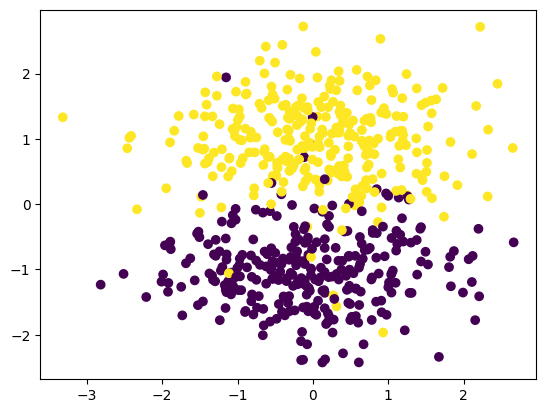

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [5]:
Y[Y == 0] = -1

In [6]:
class SVM:
    def __init__(self, c = 0.1):
        self.c = c
        self.w = 0
        self.b = 0
        
    def hingeLoss(self, w, b, x, y):
        loss = 0
        
        loss += 0.5*(np.dot(w, w.T))
        
        for i in range(x.shape[0]):
            ti = y[i] * (np.dot(w, x[i].T) + b)
            loss += self.c * max(0, (1 - ti))
        return loss[0][0]
    
    def gradient_descent(self, x, y, epochs = 100, learning_rate = 0.003, batch = 100):
        
        w = np.zeros((1, x.shape[1]))
        b = 0
        h_loss = self.hingeLoss(w, b, x, y)
        loss = []
        loss.append(h_loss)
        
        for i in range(epochs):
            print(f'On epoch: {i}')
            loss.append(self.hingeLoss(w, b, x, y))
            
            ids = np.arange(x.shape[0])
            np.random.shuffle(ids)
            
            for batch_start in range(int(x.shape[0]/batch)):
                
                grad_w = 0
                grad_b = 0
                
                for j in range(batch_start*batch, (batch_start + 1)*batch):
                    try:
                        ti = y[j] * (np.dot(w, x[j].T) + b)
                        if ti >= 1:
                            grad_b+= 0
                            grad_w += 0
                        else:
                            grad_w += self.c*y[j]*x[j]
                            grad_b += self.c*y[j]
                    except:
                        pass
                            
                w = w - learning_rate * w + learning_rate*grad_w
                b = b + learning_rate*grad_b
        self.w = w
        self.b = b
        return w, b, loss

In [7]:
svm = SVM()
w, b, epoch_loss = svm.gradient_descent(X, Y, batch = 150)

On epoch: 0
On epoch: 1
On epoch: 2
On epoch: 3
On epoch: 4
On epoch: 5
On epoch: 6
On epoch: 7
On epoch: 8
On epoch: 9
On epoch: 10
On epoch: 11
On epoch: 12
On epoch: 13
On epoch: 14
On epoch: 15
On epoch: 16
On epoch: 17
On epoch: 18
On epoch: 19
On epoch: 20
On epoch: 21
On epoch: 22
On epoch: 23
On epoch: 24
On epoch: 25
On epoch: 26
On epoch: 27
On epoch: 28
On epoch: 29
On epoch: 30
On epoch: 31
On epoch: 32
On epoch: 33
On epoch: 34
On epoch: 35
On epoch: 36
On epoch: 37
On epoch: 38
On epoch: 39
On epoch: 40
On epoch: 41
On epoch: 42
On epoch: 43
On epoch: 44
On epoch: 45
On epoch: 46
On epoch: 47
On epoch: 48
On epoch: 49
On epoch: 50
On epoch: 51
On epoch: 52
On epoch: 53
On epoch: 54
On epoch: 55
On epoch: 56
On epoch: 57
On epoch: 58
On epoch: 59
On epoch: 60
On epoch: 61
On epoch: 62
On epoch: 63
On epoch: 64
On epoch: 65
On epoch: 66
On epoch: 67
On epoch: 68
On epoch: 69
On epoch: 70
On epoch: 71
On epoch: 72
On epoch: 73
On epoch: 74
On epoch: 75
On epoch: 76
On epoch:

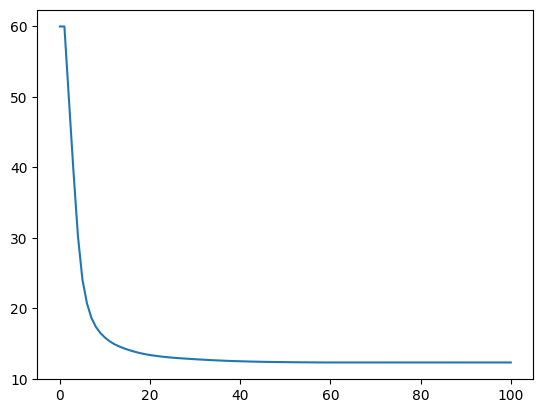

In [8]:
plt.plot(epoch_loss)

In [9]:
epoch_loss

[60.00000000000058,
 60.00000000000058,
 49.70101722373403,
 39.55531903593855,
 30.2710411541572,
 24.098470048857717,
 20.725902545194877,
 18.64903749194722,
 17.365542506110422,
 16.498485348559342,
 15.866794635310512,
 15.35802981707688,
 14.966225223784896,
 14.650264430420123,
 14.390877784898375,
 14.162243312734628,
 13.96492868901666,
 13.789589319566524,
 13.633743043750833,
 13.50152887785501,
 13.390342622063603,
 13.298702592135148,
 13.215650637608565,
 13.139091960221805,
 13.074254991438625,
 13.016385996064848,
 12.966138975322348,
 12.921060603293107,
 12.878228174349236,
 12.835949173151059,
 12.796617527498606,
 12.759401232367049,
 12.724115262925594,
 12.689276385358173,
 12.656939633410605,
 12.62542838584117,
 12.596881600417536,
 12.570780098567608,
 12.548057192216113,
 12.527972267098196,
 12.509566453583199,
 12.491379107834513,
 12.473407347089775,
 12.457409378677113,
 12.442922400659755,
 12.428750534964326,
 12.418221930359302,
 12.407210966760703,
 12

In [10]:
w, b

(array([[0.01519782, 1.3638189 ]]), 0.06660000000000019)

In [11]:
def visualise(w1, w2, b):
    
    x = np.arange(-5, 10)
    y = -(w1*x + b)/w2
    
    l1 = -(w1*x + b + 1)/w2
    l2 = -(w1*x + b - 1)/w2
    
    plt.plot(x, y)
    plt.plot(x, l1)
    plt.plot(x, l2)
    plt.scatter(X[:, 0], X[:, 1], c = color)

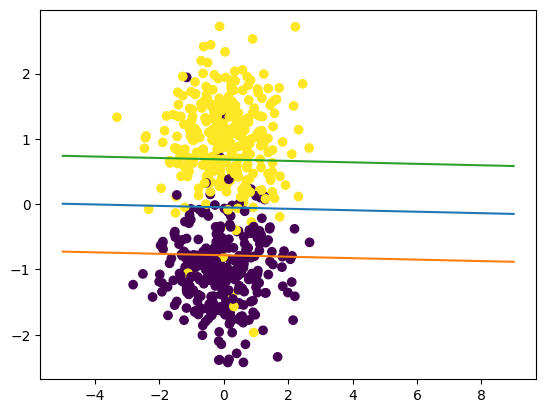

In [12]:
visualise(w[0, 0], w[0, 1], b)